<a href="https://colab.research.google.com/github/ramyamssm/Card/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('creditcard.csv')

In [ ]:
# Overview of data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Convert 'Class' to categorical for clarity
df['Class'] = df['Class'].astype('category')

# Count of fraud vs non-fraud
print(df['Class'].value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_time  

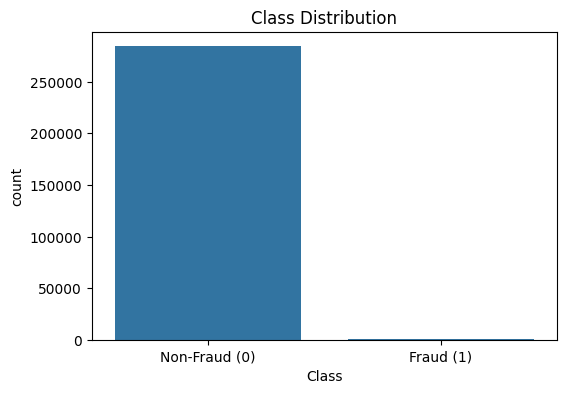

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

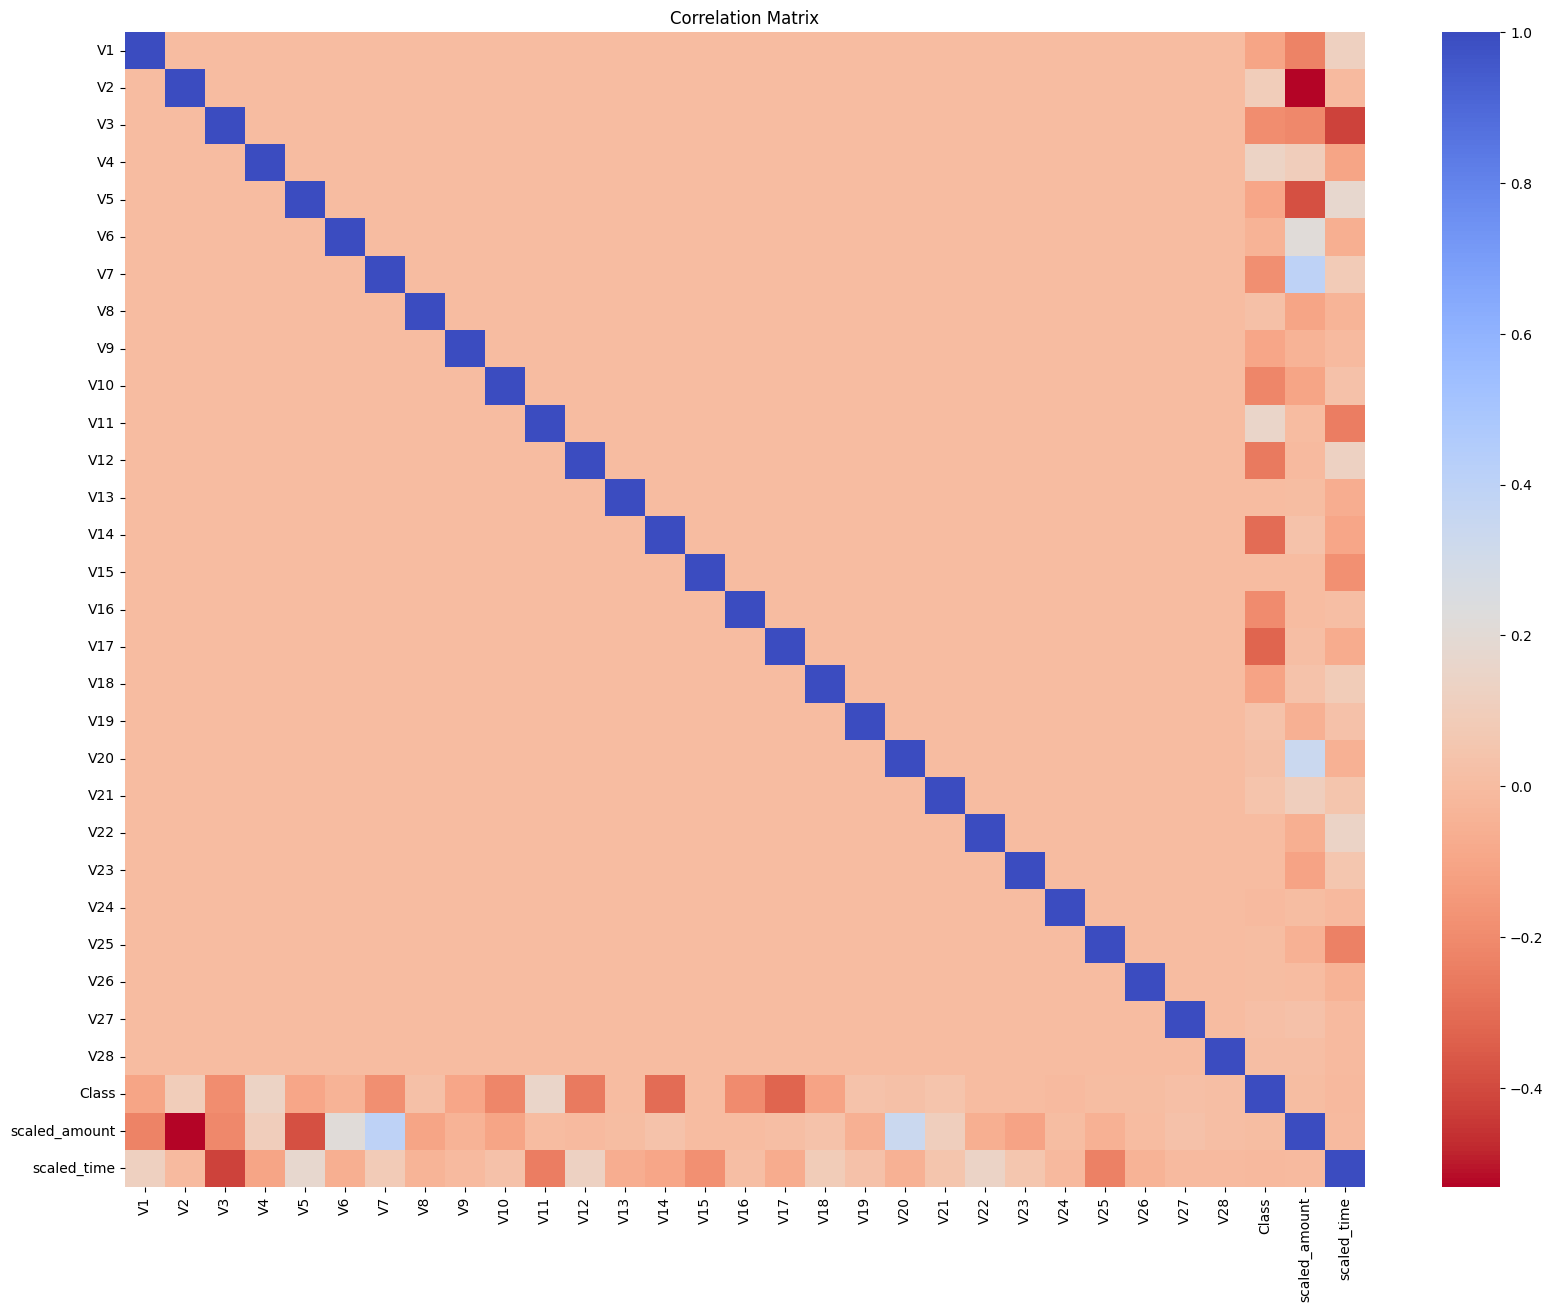

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Undersample non-fraud to match fraud class for balanced training sample
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)

balanced_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Class'].value_counts())

Class
0    492
1    492
Name: count, dtype: int64
